# Twitter Integrated Bot in the Identification of Misinformation and Propogation Prevention 
## Classification Dataset Comparison
### Victor Chua 0129219 UCOMS 

This is a comparison and evaluation of the two collected classification datasets. 
Due to the increased enforcement in anti-misinformation posts for COVID - 19, it is now difficult to scrape information directly from social media. Hence I have opted to look for datasets that have collected false statements prior to active enforcement.
#### Dataset 1
Dataset 1 is a COVID Fake News Dataset collected by Sumit Banik and is submitted under Zenodo.org's Coronavirus Disease Research Community - COVID-19 section. 
https://zenodo.org/record/4282522

#### Dataset 2
Dataset 2 is a COVID-19 Fake News Dataset that is curated through Twitter statements by Patwa et al.
https://arxiv.org/ftp/arxiv/papers/2011/2011.03327.pdf



In [57]:
# Import necessary libraries
import pandas as pd

In [59]:
# I have two unique datasets to work with. Hence I will be attempting to merge them together.
# DF 1 - Covid Fake News Dataset with Binary Labels (0 = Fake, 1 = True)
df1 = pd.read_csv(r'C:\Users\vcmc4\Desktop\Classes\FYP\FYP Codes & Dataset\Covid Datasets\COVID Fake News Data.csv')
df1

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0
...,...,...
10196,A Chinese market caused the new coronavirus (v...,0
10197,The peak of the new coronavirus will happen in...,0
10198,Stores and supermarkets in Veracruz (Mexico) w...,0
10199,"A chain message circulated on Tuesday, Jan. 14...",0


In [60]:
df1.columns = ['headlines', 'label']
df1 = df1.replace({0:1, 1:0}) # Flip binary values to match; 0 = true, 1 = false
df1

,headlines,label
0,A post claims compulsory vacination violates t...,1
1,A photo claims that this person is a doctor wh...,1
2,Post about a video claims that it is a protest...,1
3,All deaths by respiratory failure and pneumoni...,1
4,The dean of the College of Biologists of Euska...,1
...,...,...
10196,A Chinese market caused the new coronavirus (v...,1
10197,The peak of the new coronavirus will happen in...,1
10198,Stores and supermarkets in Veracruz (Mexico) w...,1
10199,"A chain message circulated on Tuesday, Jan. 14...",1


In [61]:
df1.groupby('label').describe()

headlines                                                               
          count unique                                                top freq
label                                                                         
0           474    461  Says truck drivers are being turned away from ...    2
1          9727   8511  You no longer need to have contact with someon...   11

In [62]:
df1.label.value_counts()

1    9727
0     474
Name: label, dtype: int64

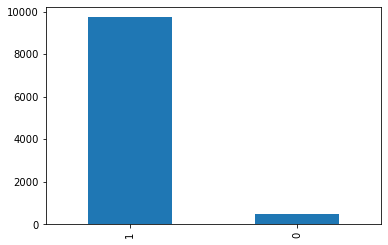

In [63]:
df1.label.value_counts().plot.bar()

In [12]:
# DF 2 - Covid Fake News Dataset with Text Labels
#df2 = pd.read_excel(r'C:\Users\vcmc4\Desktop\Classes\FYP\FYP Codes & Dataset\Covid Datasets\Constraint_English_Train.csv', sep='\t', encoding='cp1252')
df2 = pd.read_excel(r'C:\Users\vcmc4\Desktop\Classes\FYP\FYP Codes & Dataset\Covid Datasets\Constraint_English_Train.xlsx')
# There is an error that pops up when running without specifying the parameters on reading the csv, suggesting an issue with the data.
# ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2
df2.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [21]:
# Convert df2 to match df1 when merging
#df2 = df2.drop(['id'], axis = 1)
df2.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [25]:
df2['label'] = df2['label'].map({'real':0, 'fake': 1}).astype(int)
df2.head(15)

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,0
1,States reported 1121 deaths a small rise from ...,0
2,Politically Correct Woman (Almost) Uses Pandem...,1
3,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,Populous states can generate large case counts...,0
5,"Covid Act Now found ""on average each person in...",0
6,If you tested positive for #COVID19 and have n...,0
7,Obama Calls Trump’s Coronavirus Response A Cha...,1
8,"???Clearly, the Obama administration did not l...",1
9,Retraction—Hydroxychloroquine or chloroquine w...,1


In [64]:
df2.groupby('label').describe()

tweet                                                               
      count unique                                                top freq
label                                                                     
0      3360   3360  Who can get tested for #COVID19Nigeria? Testin...    1
1      3060   3060  Confused about mortality rate for coronavirus ...    1

In [65]:
df2.label.value_counts()

0    3360
1    3060
Name: label, dtype: int64

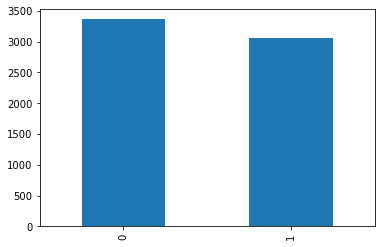

In [66]:
df2.label.value_counts().plot.bar()